In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               329 non-null float64
wc                294 non-null float64
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe       

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:

df['ane'].nunique()

2

In [7]:
df['rbc'] = (df['rbc'] == 'normal').astype(int)
df['pc'] = (df['pc'] == 'normal').astype(int)
df['pcc'] = (df['pcc'] == 'present').astype(int)
df['ba'] = (df['ba'] == 'present').astype(int)

In [8]:
df['htn'] = (df['htn'] == 'yes').astype(int)
df['dm'] = (df['dm'] == 'yes').astype(int)
df['cad'] = (df['cad'] == 'yes').astype(int)
df['pe'] = (df['pe'] == 'yes').astype(int)
df['ane'] = (df['ane'] == 'yes').astype(int)
df['appet'] = (df['appet'] == 'good').astype(int)
df['classification'] = (df['classification'] == 'ckd').astype(int)

In [9]:
df[['htn','dm', 'cad','rbc','pcc','pc','ba',
       'appet', 'pe', 'ane','classification']].head()

,htn,dm,cad,rbc,pcc,pc,ba,appet,pe,ane,classification
0,1,1,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,1,0,1,0,0,1
2,0,1,0,1,0,1,0,0,0,1,1
3,1,0,0,1,1,0,0,0,1,1,1
4,0,0,0,1,0,1,0,1,0,0,1


In [10]:
print(df.isnull().values.any())

True


In [11]:
df.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,400.00000,400.000000,400.000000,400.000000,...,348.000000,329.000000,294.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.50250,0.647500,0.105000,0.055000,...,12.526437,38.884498,8406.122449,0.367500,0.335000,0.085000,0.792500,0.190000,0.150000,0.620000
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,0.50062,0.478347,0.306937,0.228266,...,2.912587,8.990105,2944.474190,0.482728,0.472582,0.279231,0.406024,0.392792,0.357519,0.485994
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,3.100000,9.000000,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,10.300000,32.000000,6500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,...,12.650000,40.000000,8000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,1.00000,1.000000,0.000000,0.000000,...,15.000000,45.000000,9800.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.00000,1.000000,1.000000,1.000000,...,17.800000,54.000000,26400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:





df = df.drop('id',axis =1)

In [13]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


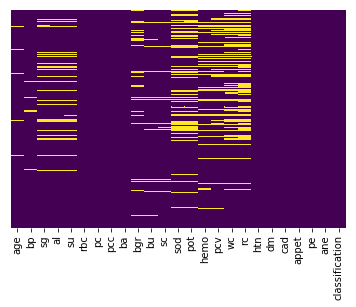

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
print(df['age'].isnull().values.any())

True


In [16]:
print(df['age'].isnull().sum())

9


In [17]:
null_indexes_age =df[df['age'].isnull()].index.tolist()
print(null_indexes_age)

[30, 73, 112, 116, 117, 169, 191, 203, 268]


In [18]:
df.age  = df.age.fillna(value = df.age.mean() )

In [19]:
print(df['age'].isnull().values.any())

False


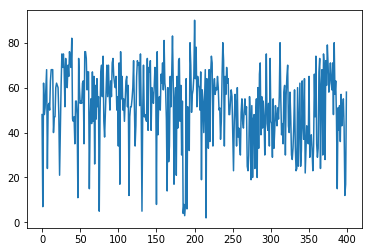

In [20]:
plt.plot(df['age'])

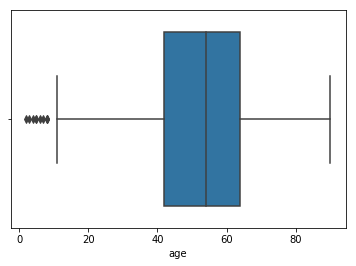

In [21]:
sns.boxplot(df['age'])

In [22]:
Q1 =  df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
outliers_df =df[(df['age'] < Q1-1.5*IQR ) | (df['age'] > Q3+1.5*IQR)]['age']
print(outliers_df)

1      7.0
75     5.0
131    5.0
150    8.0
185    4.0
186    8.0
187    3.0
188    8.0
190    6.0
215    2.0
Name: age, dtype: float64


In [24]:
type(outliers_df)

pandas.core.series.Series

In [25]:
outliers_df.index

Int64Index([1, 75, 131, 150, 185, 186, 187, 188, 190, 215], dtype='int64')

In [26]:
for i in range(len(outliers_df)):
    df['age'][outliers_df.index[i]]  = df.age.median()
print(df['age'][outliers_df.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1      54.0
75     54.0
131    54.0
150    54.0
185    54.0
186    54.0
187    54.0
188    54.0
190    54.0
215    54.0
Name: age, dtype: float64


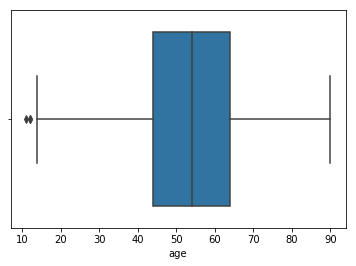

In [27]:
sns.boxplot(df['age'])

In [28]:
from scipy import stats

In [29]:
z = np.abs(stats.zscore(df['age']))
print(z)

[0.30721941 0.08552911 0.60919381 0.30721941 0.11084515 0.47827763
 1.00194233 1.87821351 0.04538706 0.02007102 0.17630324 0.6746519
 1.00194233 1.00194233 1.00194233 0.83088411 0.3726775  0.3726775
 0.47827763 0.60919381 0.54373572 0.47827763 0.30721941 2.07458777
 0.69996794 0.54373572 1.46014895 1.06740042 1.46014895 1.00194233
 0.07920429 1.32923277 0.54373572 0.47827763 1.13285851 0.80556807
 1.52560703 1.26377468 1.06740042 1.91835556 0.43813559 0.50359368
 0.3726775  1.15817455 0.08552911 0.08552911 0.30721941 2.72916865
 1.32923277 0.47827763 0.02007102 0.08552911 0.02007102 0.60919381
 0.6746519  1.15817455 1.52560703 1.52560703 1.32923277 0.41281955
 0.93648425 0.93648425 2.4673363  0.43813559 0.1509872  0.56905176
 0.93648425 0.50359368 0.80556807 1.74729734 0.54373572 0.43813559
 0.74010998 0.07920429 0.21644529 0.08552911 0.30721941 0.93648425
 1.13285851 0.21644529 1.39469086 0.50359368 0.96180029 0.30721941
 0.41281955 1.13285851 0.21644529 1.13285851 0.34736146 0.176303

In [30]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [31]:
count =0
for i in range(len(df)):
    if df['age'][i]<10:
        count =count+1
        print(df['age'][i])

In [32]:
a = df[df.age < 14].index
df = df.drop(a,axis=0)


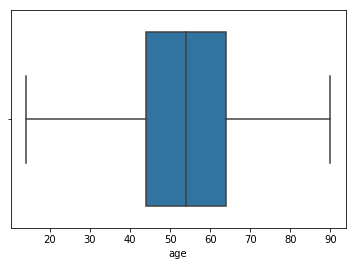

In [33]:
sns.boxplot(df['age'])

In [34]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,54.0,50.0,1.020,4.0,0.0,0,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 25 columns):
age               397 non-null float64
bp                385 non-null float64
sg                350 non-null float64
al                351 non-null float64
su                348 non-null float64
rbc               397 non-null int32
pc                397 non-null int32
pcc               397 non-null int32
ba                397 non-null int32
bgr               355 non-null float64
bu                378 non-null float64
sc                380 non-null float64
sod               312 non-null float64
pot               311 non-null float64
hemo              345 non-null float64
pcv               327 non-null float64
wc                291 non-null float64
rc                269 non-null object
htn               397 non-null int32
dm                397 non-null int32
cad               397 non-null int32
appet             397 non-null int32
pe                397 non-null int32
ane              

In [36]:
print(df['bp'].isnull().values.any())

True


In [37]:
print(df['bp'].isnull().sum())

12


In [38]:
null_indexes_age =df[df['bp'].isnull()].index.tolist()
print(null_indexes_age)

[7, 75, 132, 138, 161, 164, 185, 187, 188, 215, 293, 316]


In [39]:
df.bp  = df.bp.fillna(value = df.bp.mean() )

In [40]:
print(df['bp'].isnull().values.any())

False


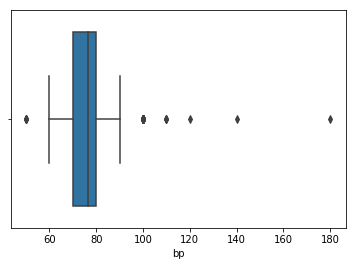

In [41]:
sns.boxplot(df['bp'])

In [42]:
Q1 =  df['bp'].quantile(0.25)
Q3 = df['bp'].quantile(0.75)
IQR = Q3 - Q1

In [43]:
outliers_df_bp =df[(df['bp'] < Q1-1.5*IQR ) | (df['bp'] > Q3+1.5*IQR)]['bp']
print(outliers_df_bp)

1       50.0
8      100.0
18     100.0
24     100.0
33     100.0
42     100.0
51     100.0
59     100.0
73     100.0
87     100.0
88     110.0
90     100.0
93     100.0
98     140.0
99     180.0
107    100.0
124    100.0
131     50.0
133    100.0
134    100.0
146    100.0
175     50.0
186     50.0
192    110.0
196    100.0
198    100.0
210    100.0
211    120.0
217    100.0
226    100.0
229     50.0
233    100.0
234    100.0
238    100.0
245    100.0
246    110.0
Name: bp, dtype: float64


In [44]:
for i in range(len(outliers_df_bp)):
    df['bp'][outliers_df_bp.index[i]]  = df.bp.median()
print(df['bp'][outliers_df_bp.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1      76.493506
8      76.493506
18     76.493506
24     76.493506
33     76.493506
42     76.493506
51     76.493506
59     76.493506
73     76.493506
87     76.493506
88     76.493506
90     76.493506
93     76.493506
98     76.493506
99     76.493506
107    76.493506
124    76.493506
131    76.493506
133    76.493506
134    76.493506
146    76.493506
175    76.493506
186    76.493506
192    76.493506
196    76.493506
198    76.493506
210    76.493506
211    76.493506
217    76.493506
226    76.493506
229    76.493506
233    76.493506
234    76.493506
238    76.493506
245    76.493506
246    76.493506
Name: bp, dtype: float64


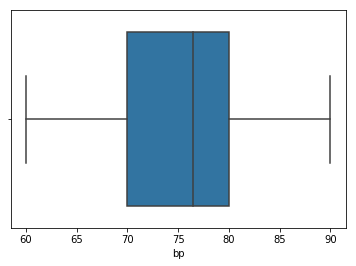

In [45]:
sns.boxplot(df['bp'])

In [46]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,54.0,76.493506,1.020,4.0,0.0,0,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.000000,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.000000,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.000000,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 25 columns):
age               397 non-null float64
bp                397 non-null float64
sg                350 non-null float64
al                351 non-null float64
su                348 non-null float64
rbc               397 non-null int32
pc                397 non-null int32
pcc               397 non-null int32
ba                397 non-null int32
bgr               355 non-null float64
bu                378 non-null float64
sc                380 non-null float64
sod               312 non-null float64
pot               311 non-null float64
hemo              345 non-null float64
pcv               327 non-null float64
wc                291 non-null float64
rc                269 non-null object
htn               397 non-null int32
dm                397 non-null int32
cad               397 non-null int32
appet             397 non-null int32
pe                397 non-null int32
ane              

In [48]:
print(df['sg'].isnull().values.any())
print(df['sg'].isnull().sum())
null_indexes_sg =df[df['sg'].isnull()].index.tolist()
print(null_indexes_sg)
df.sg  = df.sg.fillna(value = df.sg.mean() )
print(df['sg'].isnull().values.any())


True
47
[13, 17, 21, 28, 30, 37, 50, 57, 59, 78, 81, 82, 86, 98, 99, 104, 106, 109, 121, 122, 125, 132, 142, 148, 151, 160, 162, 166, 174, 188, 197, 201, 202, 203, 205, 208, 222, 228, 231, 236, 238, 245, 268, 280, 295, 322, 346]
False


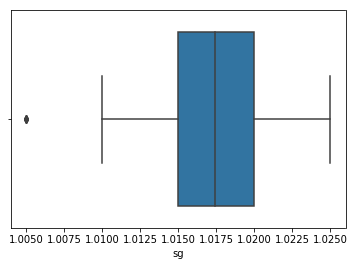

In [49]:
sns.boxplot(df['sg'])

In [50]:
Q1 =  df['sg'].quantile(0.25)
Q3 = df['sg'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_sg =df[(df['sg'] < Q1-1.5*IQR ) | (df['sg'] > Q3+1.5*IQR)]['sg']
print(outliers_df_sg)

3      1.005
29     1.005
48     1.005
55     1.005
76     1.005
87     1.005
154    1.005
Name: sg, dtype: float64


In [51]:
for i in range(len(outliers_df_sg)):
    df['sg'][outliers_df_sg.index[i]]  = df.sg.median()
print(df['sg'][outliers_df_sg.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3      1.017429
29     1.017429
48     1.017429
55     1.017429
76     1.017429
87     1.017429
154    1.017429
Name: sg, dtype: float64


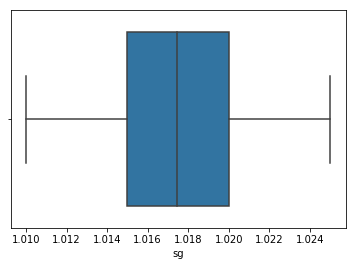

In [52]:
sns.boxplot(df['sg'])

In [53]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
count,397.000000,397.000000,397.000000,351.000000,348.000000,397.000000,397.000000,397.000000,397.000000,355.000000,...,345.000000,327.000000,291.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,53.003401,74.563447,1.017648,1.008547,0.454023,0.503778,0.647355,0.103275,0.055416,148.171831,...,12.511014,38.834862,8405.154639,0.370277,0.337531,0.085642,0.790932,0.191436,0.151134,0.619647
std,14.929607,9.177873,0.005109,1.349047,1.103132,0.500617,0.478396,0.304701,0.229078,79.352438,...,2.916751,8.993706,2955.650502,0.483488,0.473465,0.280188,0.407156,0.393928,0.358631,0.486086
min,14.000000,60.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,3.100000,9.000000,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,10.300000,32.000000,6500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,76.493506,1.017429,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,12.600000,40.000000,8000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,...,15.000000,45.000000,9800.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,90.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,17.800000,54.000000,26400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
print(df['al'].isnull().values.any())
print(df['al'].isnull().sum())
null_indexes_al =df[df['al'].isnull()].index.tolist()
print(null_indexes_al)
df.al  = df.al.fillna(value = df.al.mean() )
print(df['al'].isnull().values.any())


True
46
[13, 17, 21, 30, 37, 50, 57, 59, 78, 81, 82, 86, 98, 104, 106, 109, 122, 125, 132, 134, 136, 142, 148, 151, 160, 162, 166, 174, 188, 197, 201, 202, 203, 205, 208, 222, 228, 231, 236, 238, 245, 268, 280, 295, 322, 346]
False


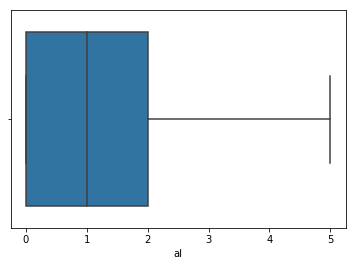

In [55]:

sns.boxplot(df['al'])

In [56]:
Q1 =  df['al'].quantile(0.25)
Q3 = df['al'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_al =df[(df['al'] < Q1-1.5*IQR ) | (df['al'] > Q3+1.5*IQR)]['al']
print(outliers_df_al)

Series([], Name: al, dtype: float64)


In [57]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,54.0,76.493506,1.020000,4.0,0.0,0,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.000000,1.010000,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.000000,1.017429,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.000000,1.010000,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


In [58]:
print(df['su'].isnull().values.any())
print(df['su'].isnull().sum())
null_indexes_su =df[df['su'].isnull()].index.tolist()
print(null_indexes_su)
df.su  = df.su.fillna(value = df.su.mean() )
print(df['su'].isnull().values.any())


True
49
[13, 17, 21, 30, 37, 50, 57, 59, 78, 81, 82, 85, 86, 98, 104, 106, 109, 121, 122, 125, 132, 134, 136, 142, 148, 151, 160, 162, 166, 174, 188, 194, 197, 201, 202, 203, 205, 208, 222, 228, 231, 236, 238, 245, 268, 280, 295, 322, 346]
False


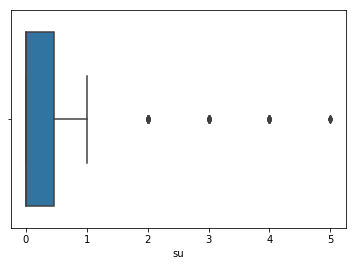

In [59]:
sns.boxplot(df['su'])

In [60]:
Q1 =  df['su'].quantile(0.25)
Q3 = df['su'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_su =df[(df['su'] < Q1-1.5*IQR ) | (df['su'] > Q3+1.5*IQR)]['su']
print(outliers_df_su)

2      3.0
7      4.0
10     4.0
14     2.0
18     3.0
27     4.0
28     3.0
39     2.0
53     5.0
54     2.0
56     4.0
61     3.0
69     4.0
70     4.0
72     3.0
90     2.0
93     2.0
99     4.0
107    4.0
111    3.0
113    2.0
120    3.0
123    3.0
128    3.0
135    2.0
140    4.0
143    4.0
146    3.0
154    3.0
158    2.0
165    2.0
168    4.0
169    2.0
170    5.0
172    2.0
180    4.0
184    2.0
198    2.0
204    2.0
210    2.0
212    4.0
223    3.0
225    5.0
226    2.0
237    2.0
242    3.0
244    2.0
248    3.0
Name: su, dtype: float64


In [61]:
for i in range(len(outliers_df_su)):
    df['su'][outliers_df_su.index[i]]  = df.su.median()
print(df['su'][outliers_df_su.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2      0.0
7      0.0
10     0.0
14     0.0
18     0.0
27     0.0
28     0.0
39     0.0
53     0.0
54     0.0
56     0.0
61     0.0
69     0.0
70     0.0
72     0.0
90     0.0
93     0.0
99     0.0
107    0.0
111    0.0
113    0.0
120    0.0
123    0.0
128    0.0
135    0.0
140    0.0
143    0.0
146    0.0
154    0.0
158    0.0
165    0.0
168    0.0
169    0.0
170    0.0
172    0.0
180    0.0
184    0.0
198    0.0
204    0.0
210    0.0
212    0.0
223    0.0
225    0.0
226    0.0
237    0.0
242    0.0
244    0.0
248    0.0
Name: su, dtype: float64


In [62]:
a = df[df.su > 1.5].index
df = df.drop(a,axis=0)


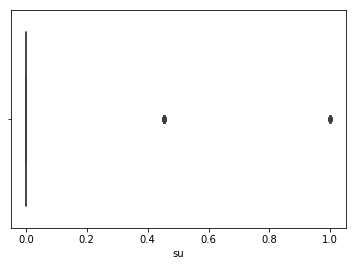

In [63]:
sns.boxplot(df['su'])

In [64]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,54.0,76.493506,1.020000,4.0,0.0,0,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.000000,1.010000,2.0,0.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.000000,1.017429,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.000000,1.010000,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 25 columns):
age               397 non-null float64
bp                397 non-null float64
sg                397 non-null float64
al                397 non-null float64
su                397 non-null float64
rbc               397 non-null int32
pc                397 non-null int32
pcc               397 non-null int32
ba                397 non-null int32
bgr               355 non-null float64
bu                378 non-null float64
sc                380 non-null float64
sod               312 non-null float64
pot               311 non-null float64
hemo              345 non-null float64
pcv               327 non-null float64
wc                291 non-null float64
rc                269 non-null object
htn               397 non-null int32
dm                397 non-null int32
cad               397 non-null int32
appet             397 non-null int32
pe                397 non-null int32
ane              

In [66]:

print(df['rbc'].isnull().values.any())

False


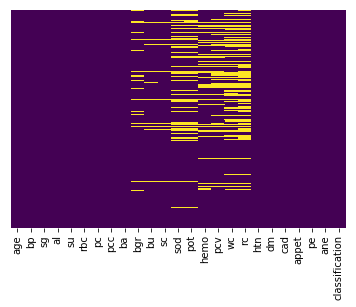

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
print(df['ba'].isnull().values.any())

False


In [69]:
print(df['rbc'].isnull().values.any())

False


In [70]:
print(df['bgr'].isnull().values.any())

True


In [71]:
print(df['bgr'].isnull().sum())
null_indexes_bgr =df[df['bgr'].isnull()].index.tolist()
print(null_indexes_bgr)
df.bgr  = df.bgr.fillna(value = df.bgr.mean() )
print(df['bgr'].isnull().values.any())

42
[1, 21, 23, 24, 29, 38, 41, 52, 54, 55, 56, 59, 65, 72, 75, 85, 112, 113, 115, 122, 123, 131, 139, 141, 145, 161, 165, 186, 187, 193, 194, 197, 209, 215, 232, 234, 276, 283, 312, 315, 332, 378]
False


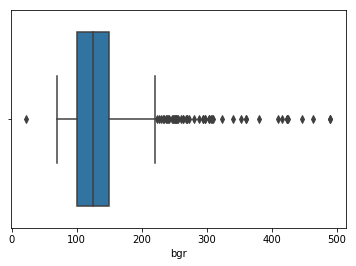

In [72]:
sns.boxplot(df['bgr'])

In [73]:
Q1 =  df['bgr'].quantile(0.25)
Q3 = df['bgr'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_bgr =df[(df['bgr'] < Q1-1.5*IQR ) | (df['bgr'] > Q3+1.5*IQR)]['bgr']
print(outliers_df_bgr)

2      423.0
7      410.0
10     490.0
11     380.0
18     263.0
27     264.0
35     270.0
53     246.0
58     253.0
67     425.0
69     250.0
70     360.0
81     360.0
86     415.0
88     251.0
90     280.0
93     295.0
99     298.0
103    226.0
107    297.0
109    233.0
111    294.0
120    323.0
125    308.0
128    224.0
137    268.0
140    256.0
147    288.0
153    273.0
154    242.0
158    424.0
159    303.0
168    307.0
170    447.0
172    309.0
173     22.0
175    261.0
180    234.0
184    352.0
189    239.0
198    252.0
207    230.0
208    341.0
210    255.0
212    253.0
219    238.0
221    248.0
223    303.0
225    490.0
229    241.0
231    269.0
244    463.0
248    424.0
Name: bgr, dtype: float64


In [74]:
for i in range(len(outliers_df_bgr)):
    df['bgr'][outliers_df_bgr.index[i]]  = df.bgr.median()
print(df['bgr'][outliers_df_bgr.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2      125.0
7      125.0
10     125.0
11     125.0
18     125.0
27     125.0
35     125.0
53     125.0
58     125.0
67     125.0
69     125.0
70     125.0
81     125.0
86     125.0
88     125.0
90     125.0
93     125.0
99     125.0
103    125.0
107    125.0
109    125.0
111    125.0
120    125.0
125    125.0
128    125.0
137    125.0
140    125.0
147    125.0
153    125.0
154    125.0
158    125.0
159    125.0
168    125.0
170    125.0
172    125.0
173    125.0
175    125.0
180    125.0
184    125.0
189    125.0
198    125.0
207    125.0
208    125.0
210    125.0
212    125.0
219    125.0
221    125.0
223    125.0
225    125.0
229    125.0
231    125.0
244    125.0
248    125.0
Name: bgr, dtype: float64


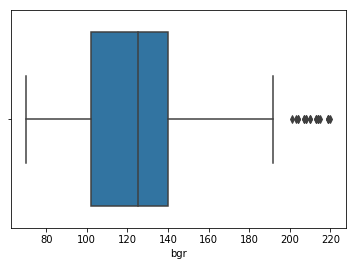

In [75]:
sns.boxplot(df['bgr'])

In [76]:
print(df['bgr']>190)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
398    False
399    False
Name: bgr, Length: 397, dtype: bool


In [77]:
a = df[df.bgr > 190].index
df = df.drop(a,axis=0)
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,326.000000,311.000000,279.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,52.895734,74.504589,1.017844,0.974268,0.077272,0.517333,0.658667,0.093333,0.050667,119.395245,...,12.614110,39.080386,8367.383513,0.354667,0.309333,0.082667,0.797333,0.181333,0.144000,0.600000
std,15.059749,9.293761,0.005116,1.257868,0.205739,0.500367,0.474791,0.291288,0.219609,24.126463,...,2.925135,9.022372,2961.402296,0.479051,0.462836,0.275746,0.402523,0.385809,0.351559,0.490552
min,15.000000,60.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,3.100000,9.000000,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,10.625000,32.500000,6500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,76.493506,1.017429,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,123.000000,...,12.950000,41.000000,7900.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,133.000000,...,15.000000,46.000000,9800.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,90.000000,1.025000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,184.000000,...,17.800000,54.000000,26400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


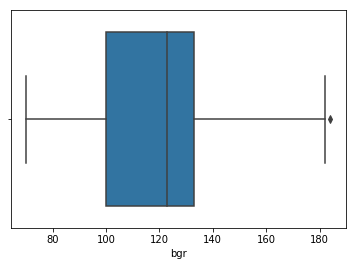

In [78]:

sns.boxplot(df['bgr'])

In [79]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.0,0.0,0,1,0,0,121.000000,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,54.0,76.493506,1.020000,4.0,0.0,0,1,0,0,148.171831,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.000000,1.010000,2.0,0.0,1,1,0,0,125.000000,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.000000,1.017429,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.000000,1.010000,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 399
Data columns (total 25 columns):
age               375 non-null float64
bp                375 non-null float64
sg                375 non-null float64
al                375 non-null float64
su                375 non-null float64
rbc               375 non-null int32
pc                375 non-null int32
pcc               375 non-null int32
ba                375 non-null int32
bgr               375 non-null float64
bu                356 non-null float64
sc                358 non-null float64
sod               293 non-null float64
pot               292 non-null float64
hemo              326 non-null float64
pcv               311 non-null float64
wc                279 non-null float64
rc                258 non-null object
htn               375 non-null int32
dm                375 non-null int32
cad               375 non-null int32
appet             375 non-null int32
pe                375 non-null int32
ane              

In [81]:
print(df['bu'].isnull().values.any())
print(df['bu'].isnull().sum())
null_indexes_bu =df[df['bu'].isnull()].index.tolist()
print(null_indexes_bu)
df.bu  = df.bu.fillna(value = df.bu.mean() )
print(df['bu'].isnull().values.any())

True
19
[23, 54, 55, 64, 67, 113, 134, 161, 165, 209, 215, 220, 232, 276, 283, 312, 315, 334, 378]
False


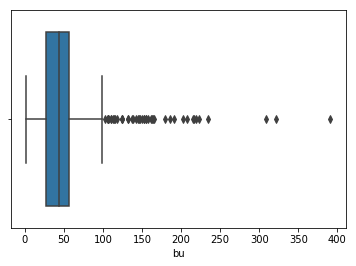

In [82]:
sns.boxplot(df['bu'])

In [83]:
Q1 =  df['bu'].quantile(0.25)
Q3 = df['bu'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_bu =df[(df['bu'] < Q1-1.5*IQR ) | (df['bu'] > Q3+1.5*IQR)]['bu']
print(outliers_df_bu)

9      107.0
15     162.0
20     148.0
21     180.0
22     163.0
30     155.0
34     153.0
38     103.0
43     202.0
50     114.0
56     164.0
57     155.0
58     142.0
61     391.0
63     111.0
73     107.0
74     107.0
76     139.0
84     186.0
98     106.0
103    217.0
106    118.0
122    219.0
126    125.0
127    125.0
128    166.0
130    208.0
133    125.0
141    106.0
142    145.0
145    322.0
153    235.0
154    132.0
172    113.0
174    146.0
178    153.0
183    106.0
184    137.0
191    115.0
193    223.0
196    158.0
197    111.0
210    132.0
212    150.0
229    191.0
246    215.0
249    309.0
Name: bu, dtype: float64


In [84]:
for i in range(len(outliers_df_bu)):
    df['bu'][outliers_df_bu.index[i]]  = df.bu.median()
print(df['bu'][outliers_df_bu.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


9      44.0
15     44.0
20     44.0
21     44.0
22     44.0
30     44.0
34     44.0
38     44.0
43     44.0
50     44.0
56     44.0
57     44.0
58     44.0
61     44.0
63     44.0
73     44.0
74     44.0
76     44.0
84     44.0
98     44.0
103    44.0
106    44.0
122    44.0
126    44.0
127    44.0
128    44.0
130    44.0
133    44.0
141    44.0
142    44.0
145    44.0
153    44.0
154    44.0
172    44.0
174    44.0
178    44.0
183    44.0
184    44.0
191    44.0
193    44.0
196    44.0
197    44.0
210    44.0
212    44.0
229    44.0
246    44.0
249    44.0
Name: bu, dtype: float64


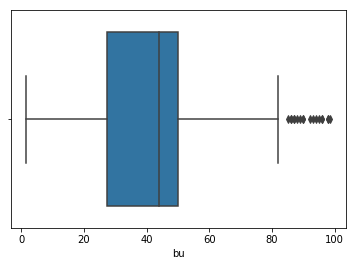

In [85]:
sns.boxplot(df['bu'])

In [86]:
a = df[df.bu > 78].index
df = df.drop(a,axis=0)
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,305.000000,294.000000,266.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,52.345327,74.258489,1.018086,0.932835,0.070252,0.532578,0.677054,0.087819,0.042493,118.838655,...,12.820328,39.625850,8329.323308,0.320113,0.288952,0.065156,0.804533,0.172805,0.141643,0.575071
std,15.077688,9.223072,0.005061,1.259521,0.198610,0.499646,0.468266,0.283433,0.201997,23.871022,...,2.852512,8.851225,2978.306014,0.467182,0.453919,0.247151,0.397123,0.378615,0.349179,0.495034
min,15.000000,60.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,3.100000,9.000000,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,10.900000,33.000000,6425.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,76.493506,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,123.000000,...,13.200000,41.000000,7900.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,63.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,133.000000,...,15.000000,46.000000,9800.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,83.000000,90.000000,1.025000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,182.000000,...,17.800000,54.000000,26400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


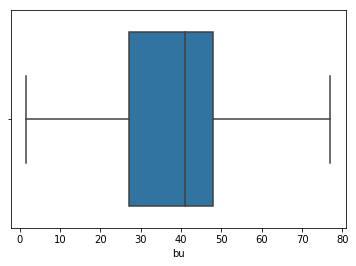

In [87]:
sns.boxplot(df['bu'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 399
Data columns (total 25 columns):
age               353 non-null float64
bp                353 non-null float64
sg                353 non-null float64
al                353 non-null float64
su                353 non-null float64
rbc               353 non-null int32
pc                353 non-null int32
pcc               353 non-null int32
ba                353 non-null int32
bgr               353 non-null float64
bu                353 non-null float64
sc                336 non-null float64
sod               276 non-null float64
pot               275 non-null float64
hemo              305 non-null float64
pcv               294 non-null float64
wc                266 non-null float64
rc                247 non-null object
htn               353 non-null int32
dm                353 non-null int32
cad               353 non-null int32
appet             353 non-null int32
pe                353 non-null int32
ane              

In [89]:
print(df['sc'].isnull().values.any())
print(df['sc'].isnull().sum())
null_indexes_sc =df[df['sc'].isnull()].index.tolist()
print(null_indexes_sc)
df.sc  = df.sc.fillna(value = df.sc.mean() )
print(df['sc'].isnull().values.any())

True
17
[23, 55, 64, 67, 113, 161, 165, 209, 215, 216, 220, 232, 276, 283, 312, 315, 334]
False


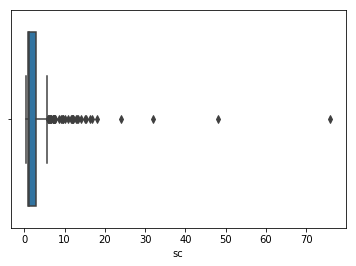

In [90]:
sns.boxplot(df['sc'])

In [91]:

Q1 =  df['sc'].quantile(0.25)
Q3 = df['sc'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_sc =df[(df['sc'] < Q1-1.5*IQR ) | (df['sc'] > Q3+1.5*IQR)]['sc']
print(outliers_df_sc)

6      24.0
9       7.2
15      9.6
21     76.0
22      7.7
30      7.3
43     10.8
56      9.7
57      7.3
61     32.0
63      6.1
73      6.7
74      6.7
76      8.5
84     15.0
98      6.5
103    10.2
105    11.5
106     6.1
122    12.2
130     9.2
134    16.9
141     6.0
142     7.1
145    13.0
148    48.1
153    14.2
154    16.4
173     7.3
174     7.5
183     6.5
191     6.0
193    18.1
196    11.8
197     9.3
210    12.8
212    11.9
226     7.2
229    12.0
246    15.2
249    13.3
Name: sc, dtype: float64


In [92]:
for i in range(len(outliers_df_sc)):
    df['sc'][outliers_df_sc.index[i]]  = df.sc.median()
print(df['sc'][outliers_df_sc.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


6      1.2
9      1.2
15     1.2
21     1.2
22     1.2
30     1.2
43     1.2
56     1.2
57     1.2
61     1.2
63     1.2
73     1.2
74     1.2
76     1.2
84     1.2
98     1.2
103    1.2
105    1.2
106    1.2
122    1.2
130    1.2
134    1.2
141    1.2
142    1.2
145    1.2
148    1.2
153    1.2
154    1.2
173    1.2
174    1.2
183    1.2
191    1.2
193    1.2
196    1.2
197    1.2
210    1.2
212    1.2
226    1.2
229    1.2
246    1.2
249    1.2
Name: sc, dtype: float64


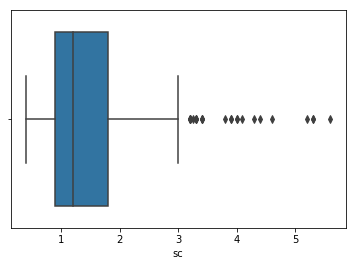

In [93]:
sns.boxplot(df['sc'])

In [94]:
a = df[df.sc > 3].index
df = df.drop(a,axis=0)


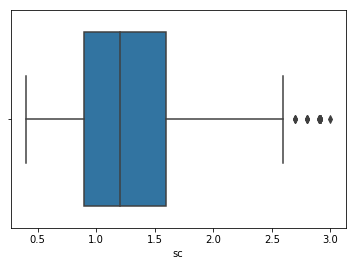

In [95]:
sns.boxplot(df['sc'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 399
Data columns (total 25 columns):
age               329 non-null float64
bp                329 non-null float64
sg                329 non-null float64
al                329 non-null float64
su                329 non-null float64
rbc               329 non-null int32
pc                329 non-null int32
pcc               329 non-null int32
ba                329 non-null int32
bgr               329 non-null float64
bu                329 non-null float64
sc                329 non-null float64
sod               256 non-null float64
pot               255 non-null float64
hemo              285 non-null float64
pcv               275 non-null float64
wc                249 non-null float64
rc                230 non-null object
htn               329 non-null int32
dm                329 non-null int32
cad               329 non-null int32
appet             329 non-null int32
pe                329 non-null int32
ane              

In [97]:
print(df['sod'].isnull().values.any())
print(df['sod'].isnull().sum())
null_indexes_sod =df[df['sod'].isnull()].index.tolist()
print(null_indexes_sod)
df.sod  = df.sod.fillna(value = df.sod.mean() )
print(df['sod'].isnull().values.any())

True
73
[0, 1, 2, 4, 7, 8, 19, 23, 28, 29, 33, 35, 41, 49, 52, 53, 55, 64, 65, 67, 69, 72, 79, 85, 86, 87, 88, 96, 103, 109, 112, 113, 115, 116, 118, 119, 123, 131, 148, 149, 150, 155, 161, 165, 167, 168, 179, 180, 187, 192, 194, 205, 207, 208, 209, 211, 214, 215, 216, 218, 219, 220, 222, 227, 228, 232, 234, 237, 283, 303, 315, 336, 363]
False


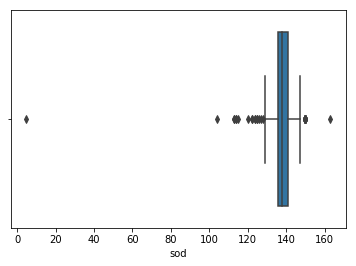

In [98]:
sns.boxplot(df['sod'])

In [99]:
Q1 =  df['sod'].quantile(0.25)
Q3 = df['sod'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_sod =df[(df['sod'] < Q1-1.5*IQR ) | (df['sod'] > Q3+1.5*IQR)]['sod']
print(outliers_df_sod)

6      104.0
9      114.0
21       4.5
48     125.0
61     163.0
81     128.0
106    127.0
145    126.0
159    122.0
171    115.0
175    113.0
176    125.0
193    113.0
196    122.0
197    124.0
229    114.0
246    120.0
249    124.0
251    150.0
265    150.0
293    150.0
295    150.0
299    150.0
307    150.0
320    150.0
324    150.0
327    150.0
332    150.0
341    150.0
344    150.0
349    150.0
353    150.0
372    150.0
384    150.0
395    150.0
Name: sod, dtype: float64


In [100]:
for i in range(len(outliers_df_sod)):
    df['sod'][outliers_df_sod.index[i]]  = df.sod.median()
print(df['sod'][outliers_df_sod.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


6      138.017578
9      138.017578
21     138.017578
48     138.017578
61     138.017578
81     138.017578
106    138.017578
145    138.017578
159    138.017578
171    138.017578
175    138.017578
176    138.017578
193    138.017578
196    138.017578
197    138.017578
229    138.017578
246    138.017578
249    138.017578
251    138.017578
265    138.017578
293    138.017578
295    138.017578
299    138.017578
307    138.017578
320    138.017578
324    138.017578
327    138.017578
332    138.017578
341    138.017578
344    138.017578
349    138.017578
353    138.017578
372    138.017578
384    138.017578
395    138.017578
Name: sod, dtype: float64


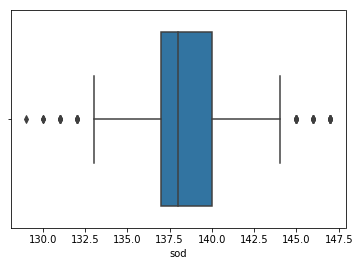

In [101]:
sns.boxplot(df['sod'])

In [102]:
a = df[(df.sod > 145) | (df.sod<130)].index

df = df.drop(a,axis=0)


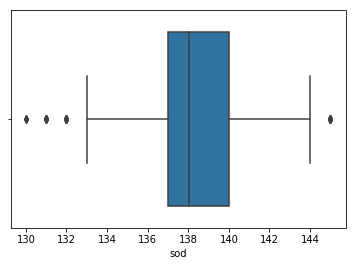

In [103]:
sns.boxplot(df['sod'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 399
Data columns (total 25 columns):
age               306 non-null float64
bp                306 non-null float64
sg                306 non-null float64
al                306 non-null float64
su                306 non-null float64
rbc               306 non-null int32
pc                306 non-null int32
pcc               306 non-null int32
ba                306 non-null int32
bgr               306 non-null float64
bu                306 non-null float64
sc                306 non-null float64
sod               306 non-null float64
pot               232 non-null float64
hemo              263 non-null float64
pcv               253 non-null float64
wc                227 non-null float64
rc                208 non-null object
htn               306 non-null int32
dm                306 non-null int32
cad               306 non-null int32
appet             306 non-null int32
pe                306 non-null int32
ane              

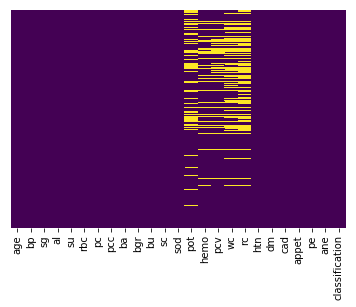

In [105]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [106]:
print(df['pot'].isnull().values.any())
print(df['pot'].isnull().sum())
null_indexes_pot =df[df['pot'].isnull()].index.tolist()
print(null_indexes_pot)
df.pot  = df.pot.fillna(value = df.pot.mean() )
print(df['pot'].isnull().values.any())

True
74
[0, 1, 2, 4, 7, 8, 19, 21, 23, 28, 29, 33, 35, 41, 49, 52, 53, 55, 64, 65, 67, 69, 72, 79, 85, 86, 87, 88, 96, 103, 109, 112, 113, 115, 116, 118, 119, 123, 131, 148, 149, 150, 155, 161, 165, 167, 168, 179, 180, 187, 192, 194, 205, 207, 208, 209, 211, 214, 215, 216, 218, 219, 220, 222, 227, 228, 232, 234, 237, 283, 303, 315, 336, 363]
False


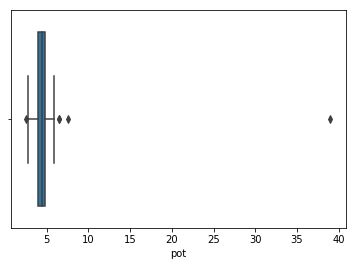

In [107]:
sns.boxplot(df['pot'])

In [108]:
Q1 =  df['pot'].quantile(0.25)
Q3 = df['pot'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_pot =df[(df['pot'] < Q1-1.5*IQR ) | (df['pot'] > Q3+1.5*IQR)]['pot']
print(outliers_df_pot)

61     39.0
84      7.6
172     2.5
193     6.5
249     6.5
Name: pot, dtype: float64


In [109]:
for i in range(len(outliers_df_pot)):
    df['pot'][outliers_df_pot.index[i]]  = df.pot.median()
print(df['pot'][outliers_df_pot.index])

61     4.487931
84     4.487931
172    4.487931
193    4.487931
249    4.487931
Name: pot, dtype: float64


C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


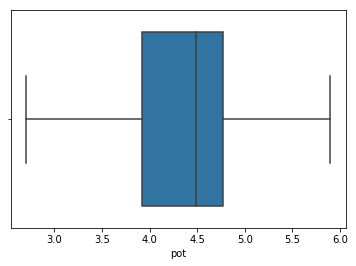

In [110]:
sns.boxplot(df['pot'])

In [111]:
print(df['hemo'].isnull().values.any())
print(df['hemo'].isnull().sum())
null_indexes_hemo =df[df['hemo'].isnull()].index.tolist()
print(null_indexes_hemo)
df.hemo  = df.hemo.fillna(value = df.hemo.mean() )
print(df['hemo'].isnull().values.any())

True
43
[23, 28, 30, 41, 57, 61, 66, 67, 82, 83, 86, 88, 89, 95, 100, 113, 116, 119, 125, 138, 140, 142, 148, 165, 175, 183, 186, 192, 194, 211, 215, 221, 222, 224, 228, 232, 247, 273, 319, 324, 328, 330, 365]
False


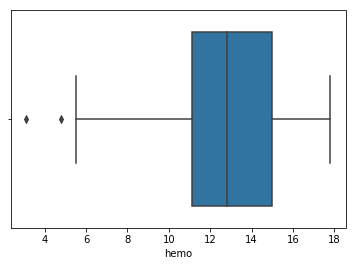

In [112]:
sns.boxplot(df['hemo'])

In [113]:
Q1 =  df['hemo'].quantile(0.25)
Q3 = df['hemo'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_hemo =df[(df['hemo'] < Q1-1.5*IQR ) | (df['hemo'] > Q3+1.5*IQR)]['hemo']
print(outliers_df_hemo)

73     4.8
249    3.1
Name: hemo, dtype: float64


In [114]:
for i in range(len(outliers_df_hemo)):
    df['hemo'][outliers_df_hemo.index[i]]  = df.hemo.median()
print(df['hemo'][outliers_df_hemo.index])

73     12.80038
249    12.80038
Name: hemo, dtype: float64


C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


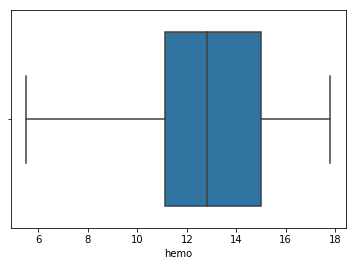

In [115]:
sns.boxplot(df['hemo'])

In [116]:
print(df['pcv'].isnull().values.any())
print(df['pcv'].isnull().sum())
null_indexes_pcv =df[df['pcv'].isnull()].index.tolist()
print(null_indexes_pcv)
df.pcv  = df.pcv.fillna(value = df.pcv.mean() )
print(df['pcv'].isnull().values.any())

True
53
[16, 23, 28, 30, 41, 57, 61, 64, 66, 67, 72, 75, 82, 83, 85, 86, 88, 89, 95, 100, 109, 113, 116, 118, 119, 120, 122, 125, 129, 138, 140, 142, 148, 165, 175, 183, 186, 192, 194, 197, 209, 211, 215, 221, 222, 224, 228, 232, 247, 273, 319, 324, 365]
False


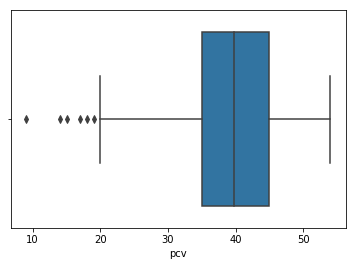

In [117]:
sns.boxplot(df['pcv'])

In [118]:
Q1 =  df['pcv'].quantile(0.25)
Q3 = df['pcv'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_pcv =df[(df['pcv'] < Q1-1.5*IQR ) | (df['pcv'] > Q3+1.5*IQR)]['pcv']
print(outliers_df_pcv)

73     14.0
98     18.0
106    17.0
141    19.0
193    15.0
249     9.0
Name: pcv, dtype: float64


In [119]:
for i in range(len(outliers_df_pcv)):
    df['pcv'][outliers_df_pcv.index[i]]  = df.pcv.median()
print(df['pcv'][outliers_df_pcv.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


73     39.6917
98     39.6917
106    39.6917
141    39.6917
193    39.6917
249    39.6917
Name: pcv, dtype: float64


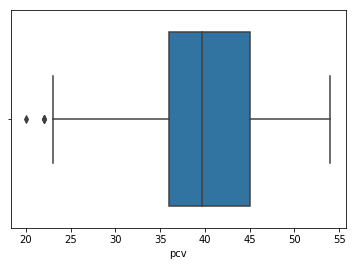

In [120]:
sns.boxplot(df['pcv'])

In [121]:
a = df[df.pcv < 21].index
df = df.drop(a,axis=0)


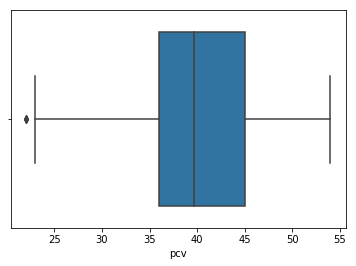

In [122]:
sns.boxplot(df['pcv'])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 399
Data columns (total 25 columns):
age               305 non-null float64
bp                305 non-null float64
sg                305 non-null float64
al                305 non-null float64
su                305 non-null float64
rbc               305 non-null int32
pc                305 non-null int32
pcc               305 non-null int32
ba                305 non-null int32
bgr               305 non-null float64
bu                305 non-null float64
sc                305 non-null float64
sod               305 non-null float64
pot               305 non-null float64
hemo              305 non-null float64
pcv               305 non-null float64
wc                226 non-null float64
rc                207 non-null object
htn               305 non-null int32
dm                305 non-null int32
cad               305 non-null int32
appet             305 non-null int32
pe                305 non-null int32
ane              

In [124]:
print(df['wc'].isnull().values.any())
print(df['wc'].isnull().sum())
null_indexes_wc =df[df['wc'].isnull()].index.tolist()
print(null_indexes_wc)
df.wc  = df.wc.fillna(value = df.wc.mean() )
print(df['wc'].isnull().values.any())

True
79
[6, 16, 23, 28, 29, 30, 33, 36, 41, 51, 55, 57, 61, 63, 64, 65, 66, 67, 72, 75, 82, 83, 85, 86, 89, 95, 96, 100, 109, 112, 116, 118, 119, 120, 121, 122, 125, 129, 138, 139, 140, 142, 148, 149, 151, 152, 154, 158, 165, 179, 180, 182, 183, 185, 186, 188, 192, 194, 202, 205, 211, 215, 216, 221, 222, 224, 228, 231, 232, 236, 239, 247, 273, 274, 287, 302, 319, 324, 330]
False


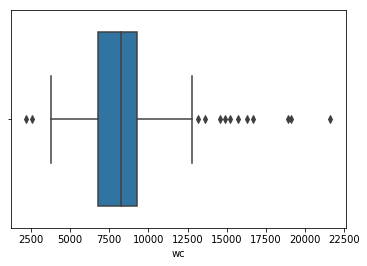

In [125]:
sns.boxplot(df['wc'])

In [126]:
Q1 =  df['wc'].quantile(0.25)
Q3 = df['wc'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_wc =df[(df['wc'] < Q1-1.5*IQR ) | (df['wc'] > Q3+1.5*IQR)]['wc']
print(outliers_df_wc)

48     18900.0
49     21600.0
88     13200.0
107    13600.0
123    14900.0
130    16300.0
147    15200.0
153    14600.0
167     2200.0
181    19100.0
190    16700.0
193     2600.0
229    15700.0
Name: wc, dtype: float64


In [127]:
for i in range(len(outliers_df_wc)):
    df['wc'][outliers_df_wc.index[i]]  = df.wc.median()
print(df['wc'][outliers_df_wc.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


48     8257.079646
49     8257.079646
88     8257.079646
107    8257.079646
123    8257.079646
130    8257.079646
147    8257.079646
153    8257.079646
167    8257.079646
181    8257.079646
190    8257.079646
193    8257.079646
229    8257.079646
Name: wc, dtype: float64


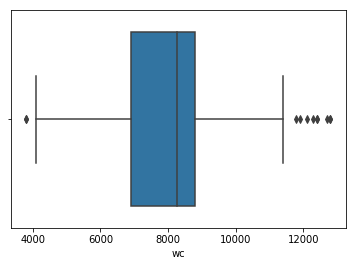

In [128]:
sns.boxplot(df['wc'])

In [129]:
a = df[(df.wc < 4500) | (df.wc>11000)].index
df = df.drop(a,axis=0)


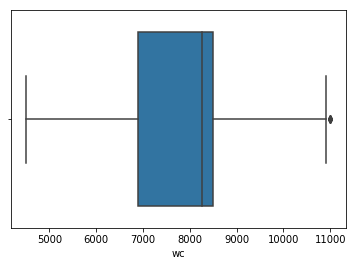

In [130]:
sns.boxplot(df['wc'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 399
Data columns (total 25 columns):
age               280 non-null float64
bp                280 non-null float64
sg                280 non-null float64
al                280 non-null float64
su                280 non-null float64
rbc               280 non-null int32
pc                280 non-null int32
pcc               280 non-null int32
ba                280 non-null int32
bgr               280 non-null float64
bu                280 non-null float64
sc                280 non-null float64
sod               280 non-null float64
pot               280 non-null float64
hemo              280 non-null float64
pcv               280 non-null float64
wc                280 non-null float64
rc                185 non-null object
htn               280 non-null int32
dm                280 non-null int32
cad               280 non-null int32
appet             280 non-null int32
pe                280 non-null int32
ane              

In [132]:
df['rc'] = df['rc'].astype(float)

In [133]:
print(df['rc'].isnull().values.any())
print(df['rc'].isnull().sum())
null_indexes_rc =df[df['rc'].isnull()].index.tolist()
print(null_indexes_rc)
df.rc  = df.rc.fillna(value = df.rc.mean() )
print(df['rc'].isnull().values.any())

True
95
[1, 2, 6, 16, 23, 28, 29, 30, 33, 36, 41, 51, 55, 57, 61, 63, 64, 65, 66, 67, 72, 73, 75, 82, 83, 85, 86, 89, 95, 96, 100, 102, 106, 109, 112, 113, 116, 118, 119, 120, 121, 122, 123, 125, 129, 138, 139, 140, 141, 142, 148, 149, 150, 151, 152, 155, 158, 165, 167, 168, 178, 179, 180, 182, 183, 185, 186, 188, 192, 194, 202, 205, 209, 211, 215, 216, 218, 220, 221, 222, 224, 228, 231, 232, 236, 237, 239, 247, 273, 274, 287, 302, 319, 324, 330]
False


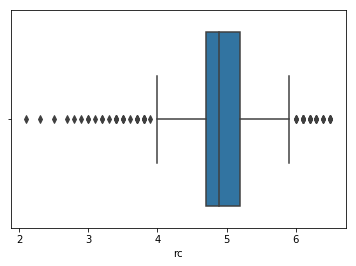

In [134]:
sns.boxplot(df['rc'])

In [135]:
Q1 =  df['rc'].quantile(0.25)
Q3 = df['rc'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_rc =df[(df['rc'] < Q1-1.5*IQR ) | (df['rc'] > Q3+1.5*IQR)]['rc']
print(outliers_df_rc)

11     3.8
19     3.7
21     3.6
22     3.4
25     3.7
43     3.1
48     3.5
49     3.5
62     3.8
69     6.0
74     3.4
81     3.7
98     2.3
130    2.7
134    3.8
147    3.0
153    2.9
154    3.0
157    3.9
163    3.2
181    3.7
191    3.4
193    2.8
196    3.5
199    3.2
212    3.4
219    3.3
226    3.4
227    3.8
229    3.8
243    6.1
246    2.5
249    2.1
253    6.2
255    6.3
278    6.4
284    6.0
286    6.0
295    6.5
303    6.1
312    6.1
320    6.2
325    6.5
328    6.5
332    6.1
337    6.2
342    6.3
345    6.4
349    6.1
356    6.1
360    6.2
365    6.3
367    6.1
382    6.5
386    6.5
388    6.4
391    6.3
396    6.2
399    6.1
Name: rc, dtype: float64


In [136]:
for i in range(len(outliers_df_wc)):
    df['rc'][outliers_df_rc.index[i]]  = df.rc.median()
print(df['rc'][outliers_df_rc.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


11     4.890811
19     4.890811
21     4.890811
22     4.890811
25     4.890811
43     4.890811
48     4.890811
49     4.890811
62     4.890811
69     4.890811
74     4.890811
81     4.890811
98     4.890811
130    2.700000
134    3.800000
147    3.000000
153    2.900000
154    3.000000
157    3.900000
163    3.200000
181    3.700000
191    3.400000
193    2.800000
196    3.500000
199    3.200000
212    3.400000
219    3.300000
226    3.400000
227    3.800000
229    3.800000
243    6.100000
246    2.500000
249    2.100000
253    6.200000
255    6.300000
278    6.400000
284    6.000000
286    6.000000
295    6.500000
303    6.100000
312    6.100000
320    6.200000
325    6.500000
328    6.500000
332    6.100000
337    6.200000
342    6.300000
345    6.400000
349    6.100000
356    6.100000
360    6.200000
365    6.300000
367    6.100000
382    6.500000
386    6.500000
388    6.400000
391    6.300000
396    6.200000
399    6.100000
Name: rc, dtype: float64


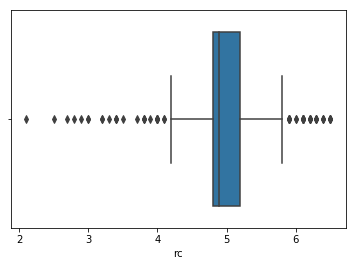

In [137]:
sns.boxplot(df['rc'])

In [138]:
#a = df[(df.wc < 4) | (df.wc>5.9)].index
#df = df.drop(a,axis=0)

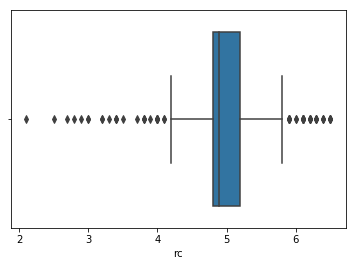

In [139]:
sns.boxplot(df['rc'])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 399
Data columns (total 25 columns):
age               280 non-null float64
bp                280 non-null float64
sg                280 non-null float64
al                280 non-null float64
su                280 non-null float64
rbc               280 non-null int32
pc                280 non-null int32
pcc               280 non-null int32
ba                280 non-null int32
bgr               280 non-null float64
bu                280 non-null float64
sc                280 non-null float64
sod               280 non-null float64
pot               280 non-null float64
hemo              280 non-null float64
pcv               280 non-null float64
wc                280 non-null float64
rc                280 non-null float64
htn               280 non-null int32
dm                280 non-null int32
cad               280 non-null int32
appet             280 non-null int32
pe                280 non-null int32
ane             

In [141]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020,1.0,0.0,0,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,54.0,76.493506,1.020,4.0,0.0,0,1,0,0,148.171831,...,38.0,6000.0,4.890811,0,0,0,1,0,0,1
2,62.0,80.000000,1.010,2.0,0.0,1,1,0,0,125.000000,...,31.0,7500.0,4.890811,0,1,0,0,0,1,1
4,51.0,80.000000,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
5,60.0,90.000000,1.015,3.0,0.0,0,0,0,0,74.000000,...,39.0,7800.0,4.400000,1,1,0,1,1,0,1


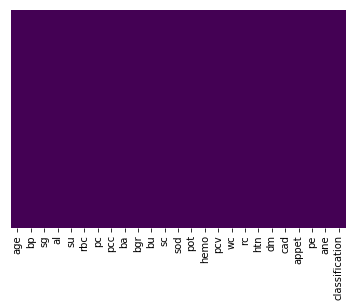

In [142]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [143]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,51.467501,74.113636,1.018366,0.822283,0.075267,0.525000,0.685714,0.078571,0.025000,118.115453,...,40.651525,7980.540455,4.948241,0.278571,0.278571,0.042857,0.835714,0.160714,0.117857,0.553571
std,15.022350,9.224884,0.004979,1.171891,0.205690,0.500269,0.465062,0.269550,0.156404,23.608044,...,7.085894,1495.661882,0.706923,0.449099,0.449099,0.202898,0.371198,0.367925,0.323016,0.498012
min,15.000000,60.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,22.000000,4500.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,37.000000,6900.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,76.493506,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,40.000000,8257.079646,4.890811,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,62.000000,80.000000,1.020000,1.008547,0.000000,1.000000,1.000000,0.000000,0.000000,131.250000,...,45.000000,8500.000000,5.200000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,90.000000,1.025000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,182.000000,...,54.000000,11000.000000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
myCorr = df.corr()

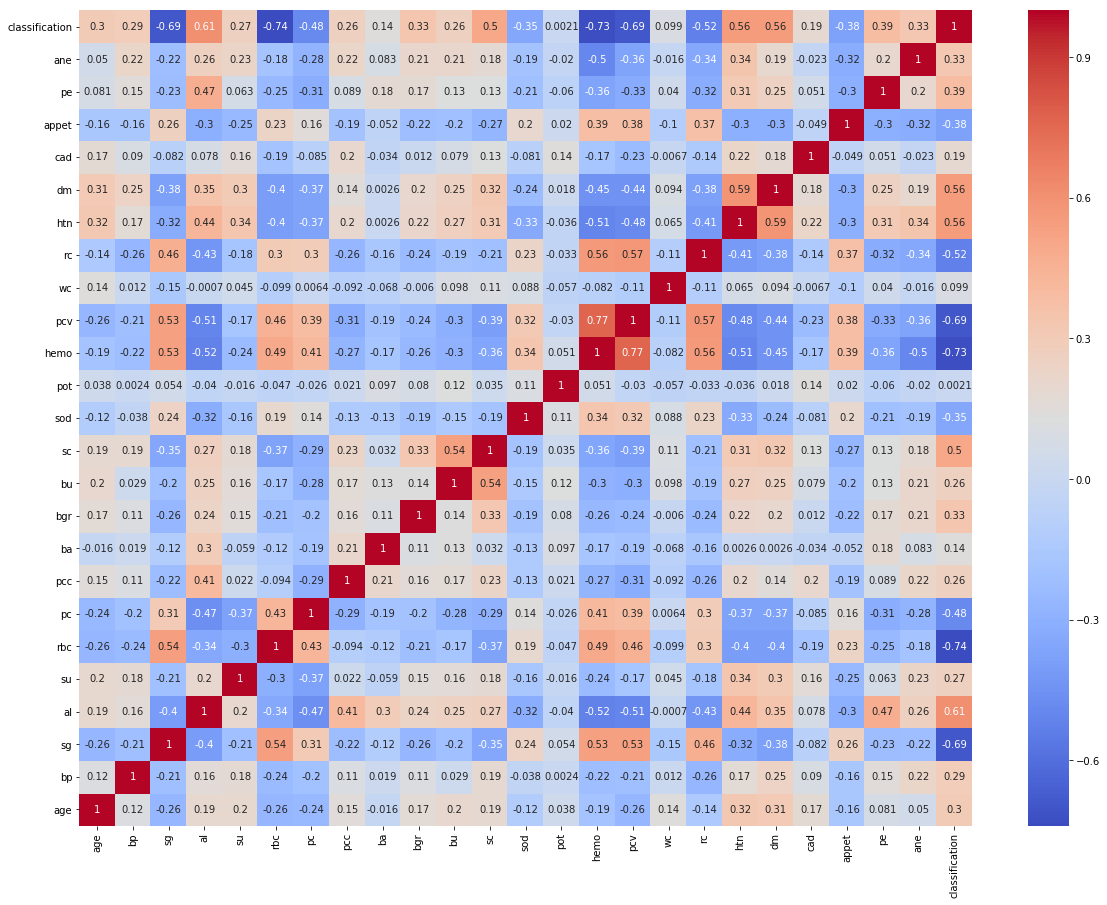

In [145]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(myCorr,cmap='coolwarm', annot = True)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

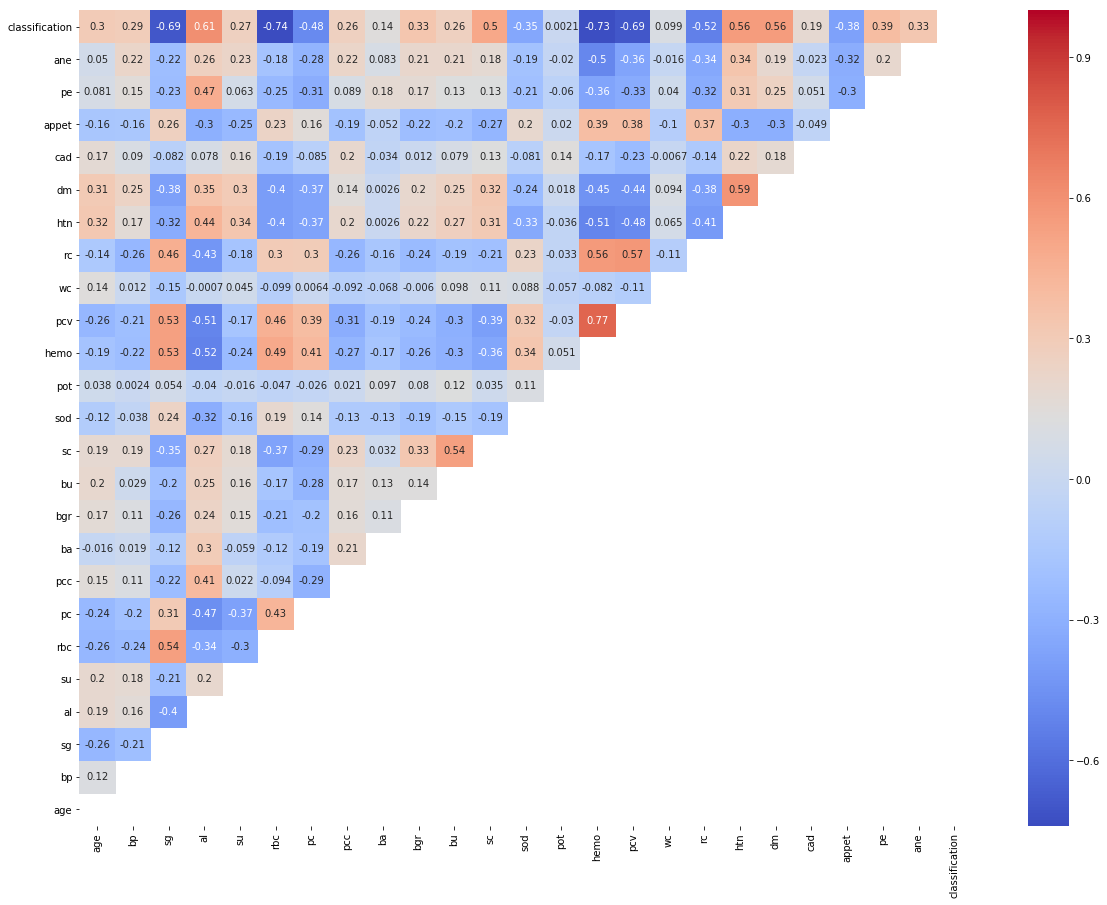

In [146]:
mask = np.zeros(myCorr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
ax = sns.heatmap(myCorr,cmap='coolwarm', annot = True,mask=mask)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=df.drop('classification',axis=1)
y=df['classification']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

lg=LogisticRegression()
lg.fit(X_train,y_train)
pred=lg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [154]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

results = confusion_matrix(y_test, pred)
accuracy=accuracy_score(y_test, pred)
report=classification_report(y_test, pred) 
print(results)
print('Logistic Model Accuracy: ',accuracy)
print('\n')
print(report)

[[40  1]
 [ 1 42]]
Logistic Model Accuracy:  0.9761904761904762


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.98      0.98      0.98        43

   micro avg       0.98      0.98      0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



In [149]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
svm_predictions = svc_model.predict(X_test)

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [151]:
svm_results = confusion_matrix(y_test, svm_predictions)
svm_accuracy=accuracy_score(y_test, svm_predictions)
svm_report=classification_report(y_test, svm_predictions) 
print(svm_results)
print('SVM Model Accuracy: ',svm_accuracy)
print('\n')
print(svm_report)

[[ 0 41]
 [ 0 43]]
SVM Model Accuracy:  0.5119047619047619


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.51      1.00      0.68        43

   micro avg       0.51      0.51      0.51        84
   macro avg       0.26      0.50      0.34        84
weighted avg       0.26      0.51      0.35        84



C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [153]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB().fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_results = confusion_matrix(y_test, nb_pred)
nb_accuracy=accuracy_score(y_test, nb_pred)
nb_report=classification_report(y_test,nb_pred) 
print(nb_results)
print('Naive Bayes Model Accuracy: ',nb_accuracy)
print('\n')
print(nb_report)



[[41  0]
 [ 5 38]]
Naive Bayes Model Accuracy:  0.9404761904761905


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        41
           1       1.00      0.88      0.94        43

   micro avg       0.94      0.94      0.94        84
   macro avg       0.95      0.94      0.94        84
weighted avg       0.95      0.94      0.94        84



In [155]:
from sklearn.metrics import roc_curve, roc_auc_score

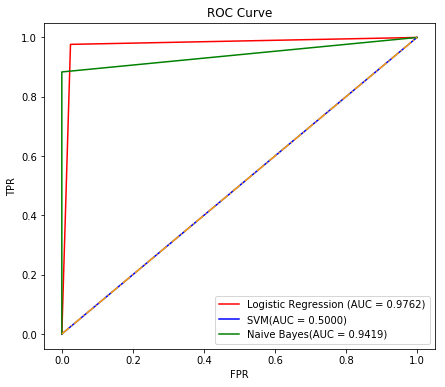

In [165]:
fpr1, tpr1, _ = roc_curve(y_test,  pred)
auc1 = roc_auc_score(y_test, pred)

plt.figure(figsize=(7, 6))

plt.plot(fpr1, tpr1, color='red',label='Logistic Regression (AUC = %0.4f)' % auc1)
plt.legend(loc='lower right')

fpr2, tpr2, _ = roc_curve(y_test, svm_predictions)
auc2 = roc_auc_score(y_test, svm_predictions)

plt.plot(fpr2, tpr2, color='blue',label='SVM(AUC = %0.4f)' % auc2)
plt.legend(loc='lower right')


fpr3, tpr3, _ = roc_curve(y_test,  nb_pred)
auc3 = roc_auc_score(y_test,nb_pred)

plt.plot(fpr3, tpr3, color='green',label='Naive Bayes(AUC = %0.4f)' % auc3)
plt.legend(loc='lower right')

plt.plot([0,1], [0,1], color='orange', linestyle='-.')



plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()